In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from time import time

In [2]:
data = pd.read_csv('concrete.csv')
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  

### EDA Analysis Starts

In [3]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
data.shape

(1030, 9)

### 1030 Rows and 9 columns

### There are 8 dependent variables and 1 independent variable

In [5]:
#Data type of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles,

In [6]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Age has a steep steps indicating a heavily skewed distribution
### Ash, Slagg, SuperPlastic has steepincrease from 75% to max

### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fc82a90>,
      dtype=object)

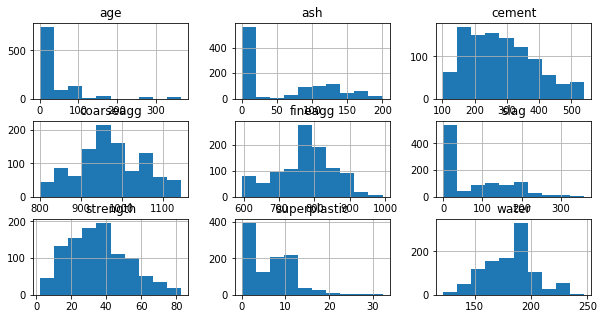

In [7]:
data.hist(figsize =(10,5))

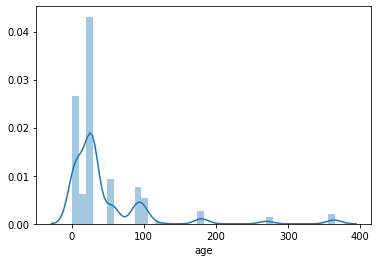

In [8]:
sns.distplot(data['age'])  #Age is continuos variable and right skewed

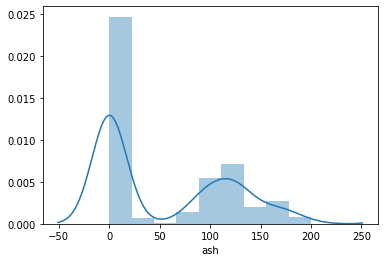

In [9]:
sns.distplot(data['ash'])  #Ash is not a continuos variable there are two different clusters mix of 2 gaussian

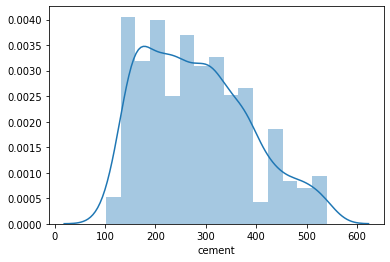

In [10]:
sns.distplot(data['cement'])  #cement is continuos variable and right skewed

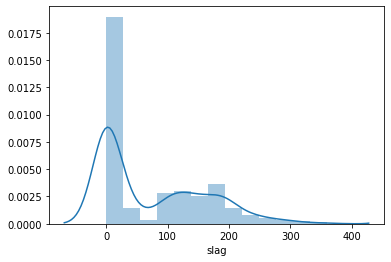

In [11]:
sns.distplot(data['slag'])  #slag is continuos variable and right skewed

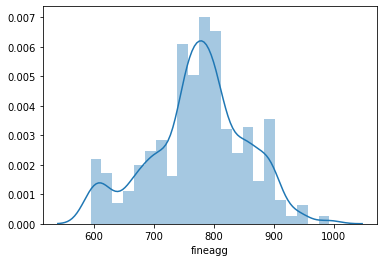

In [12]:
sns.distplot(data['fineagg'])  #fineagg is continuos variable and left skewed

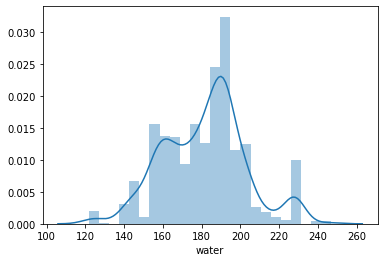

In [13]:
sns.distplot(data['water'])  #water is continuos variable and left skewed

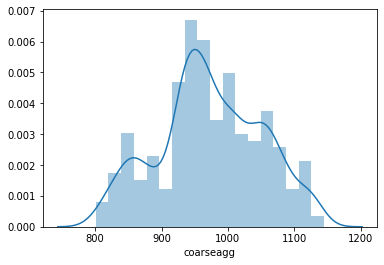

In [14]:
sns.distplot(data['coarseagg'])  #coarseagg is continuos variable and right skewed

### Check for missing values

In [15]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [16]:
data.isnull().values.any() 

False

### There are no missing values

### Check for Outliers

No outliers present


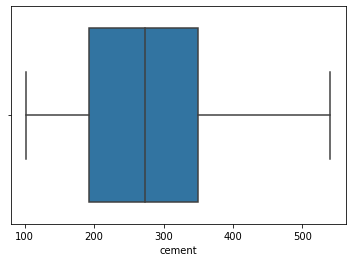

In [17]:
sns.boxplot(data["cement"])
print("No outliers present")

outliers on righ hand side to Max value for slag column


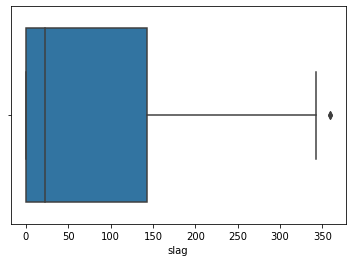

In [18]:
sns.boxplot(data["slag"])
print("outliers on righ hand side to Max value for slag column")

no outliers present


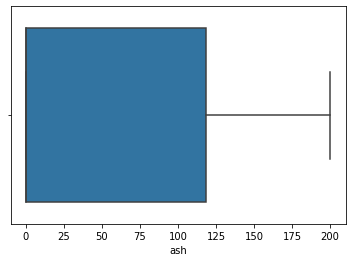

In [19]:
sns.boxplot(data["ash"])
print("no outliers present")

outliers on left and right hand side to min and Max value for water column


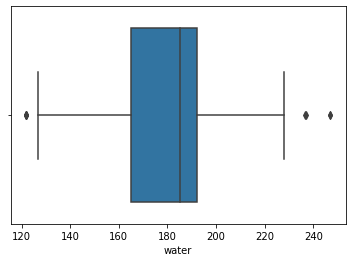

In [20]:
sns.boxplot(data["water"])
print("outliers on left and right hand side to min and Max value for water column")

outliers present on the right side


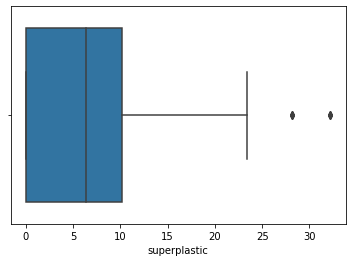

In [21]:
sns.boxplot(data["superplastic"])
print("outliers present on the right side")

no outliers present


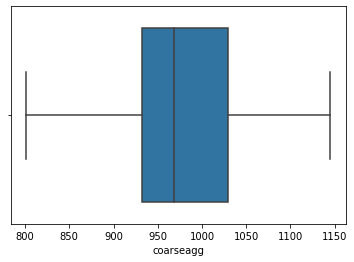

In [22]:
sns.boxplot(data["coarseagg"])
print("no outliers present")

outliers on right side


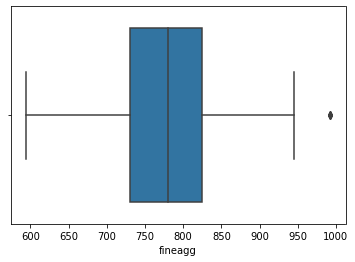

In [23]:
sns.boxplot(data["fineagg"])
print("outliers on right side")

outliers on right side


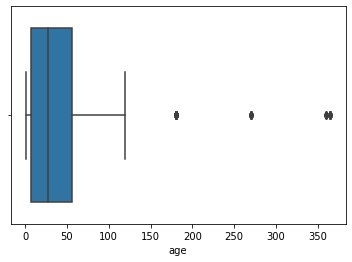

In [24]:
sns.boxplot(data["age"])
print("outliers on right side")

### Multivariate Analysis

In [25]:
data.cov() # Prints the covariance of each attribute against every other attribute

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,10921.580220,-2481.550406,-2658.299034,-182.073210,57.677098,-888.546203,-1866.130628,540.979608,869.143022
slag,-2481.550406,7444.124812,-1786.685054,197.604130,22.302400,-1905.221719,-1947.995145,-241.152238,194.337561
ash,-2658.299034,-1786.685054,4095.616541,-351.195911,144.322455,-49.565280,405.907450,-624.071384,-113.064425
water,-182.073210,197.604130,-351.195911,456.002651,-83.879313,-302.675726,-771.574925,374.491462,-103.323253
superplastic,57.677098,22.302400,144.322455,-83.879313,35.686781,-123.553888,106.659877,-72.718638,36.533734
coarseagg,-888.546203,-1905.221719,-49.565280,-302.675726,-123.553888,6045.677357,-1112.650194,-14.813131,-214.239754
fineagg,-1866.130628,-1947.995145,405.907450,-771.574925,106.659877,-1112.650194,6428.187792,-790.574335,-224.002799
age,540.979608,-241.152238,-624.071384,374.491462,-72.718638,-14.813131,-790.574335,3990.437729,347.059758
strength,869.143022,194.337561,-113.064425,-103.323253,36.533734,-214.239754,-224.002799,347.059758,279.081814


In [26]:
data.corr()  # prints the correlation coefficient between every pair of attributes

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


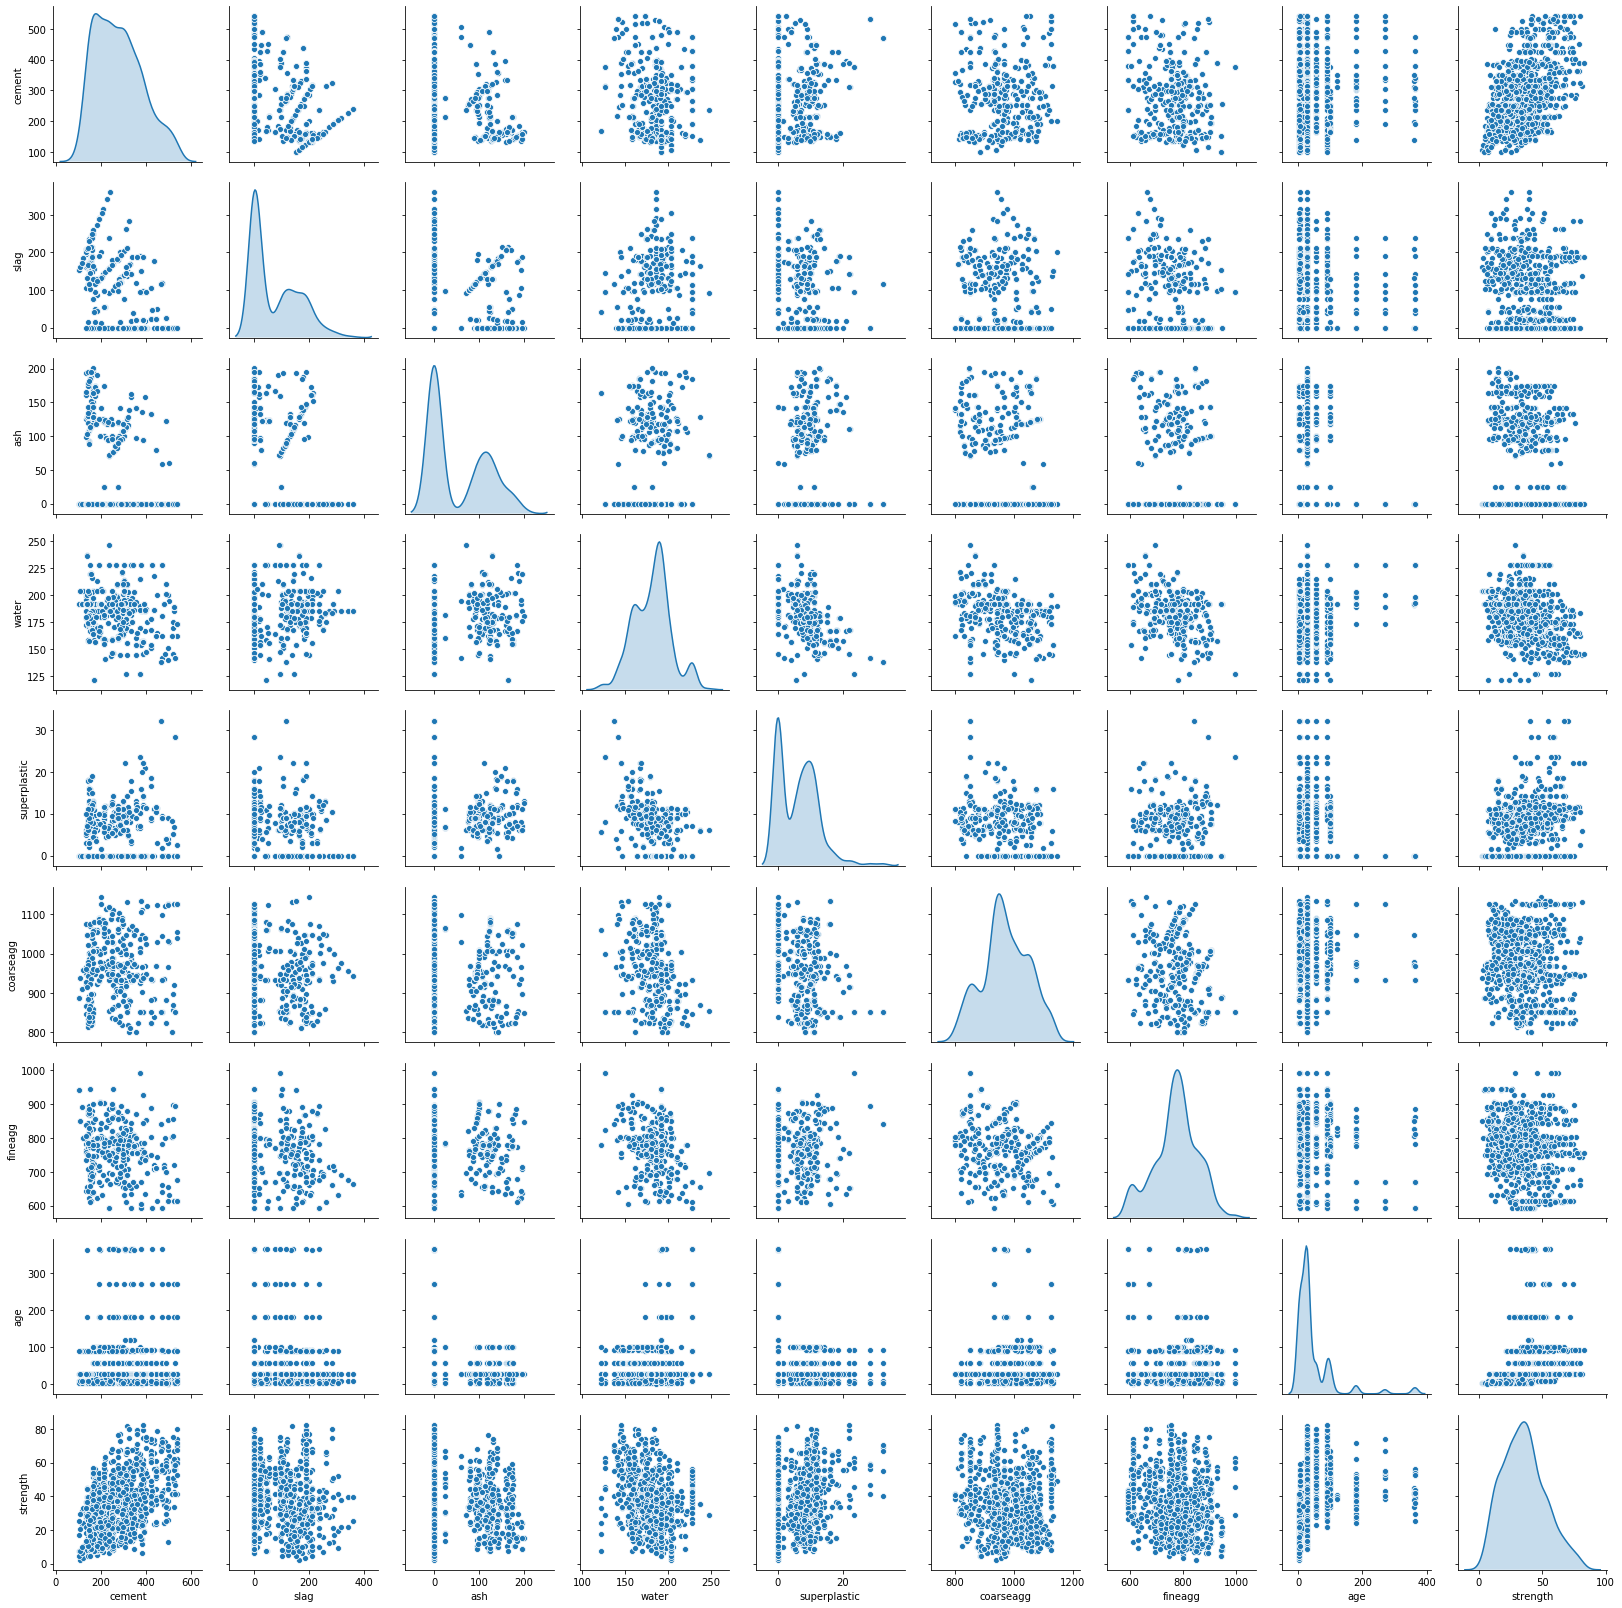

In [27]:
sns.pairplot(data, diag_kind='kde')
# plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

* We can see cement and age has correlation with strength better than others
* Ash, Water, Coarseagg and fineagg has negative correlation

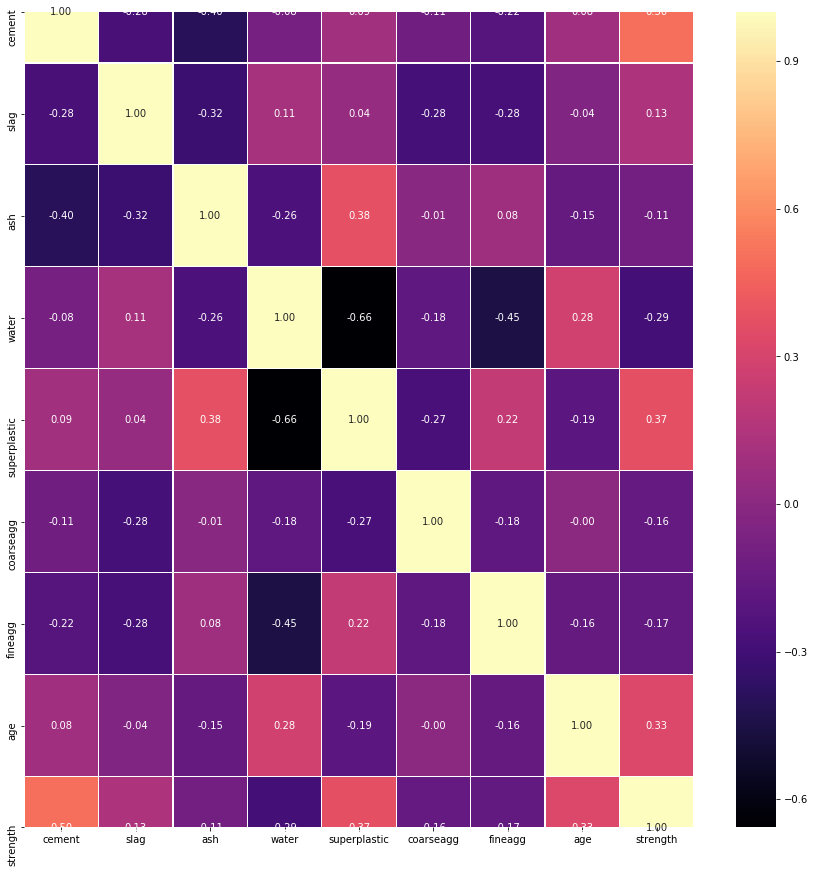

In [28]:
fig,ax = plt.subplots(figsize=(15,15))   
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") 
# the color intensity is based on light color means positive correlation and dark means negative
plt.show()

### Address presence of outliers, approaching in automated way

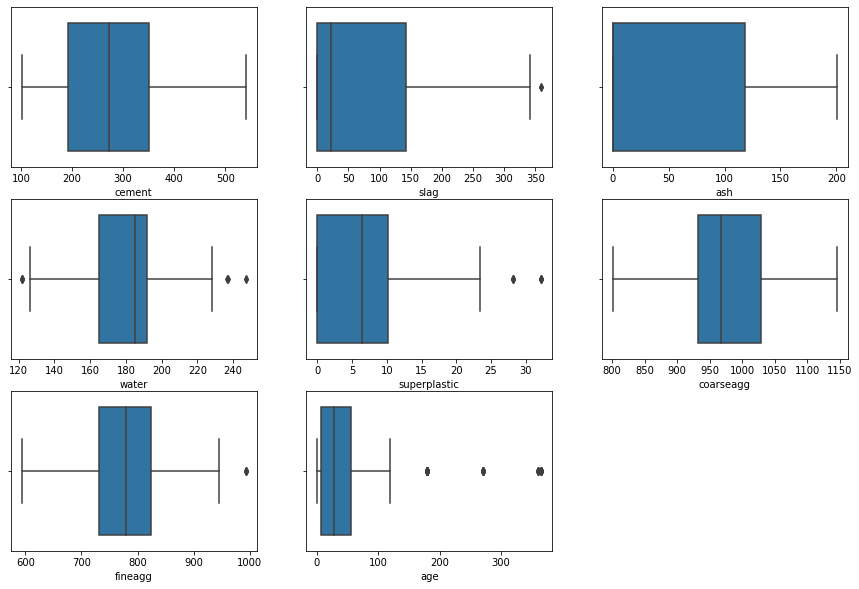

In [29]:
plt.figure(figsize=(15,10))
pos = 1
for i in data.drop(columns = 'strength').columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(data[i])
    pos += 1 

### slag, water, superplastic, fineagg, age have outliers

### Remove Outliers

In [30]:
z = np.abs(stats.zscore(data))   # get the z-score of every value with respect to their columns
print(z)

[[1.33901711 1.60144087 0.84714393 ... 0.31296991 0.27973311 0.35501811]
 [1.07479007 0.36754132 1.09607803 ... 0.28226038 0.50146528 0.73710825]
 [0.29838379 0.85688789 0.64896501 ... 1.09337085 0.27973311 0.39514356]
 ...
 [0.04564488 0.4882354  0.56454507 ... 0.06589318 0.27973311 0.50678082]
 [0.58237302 0.41624406 0.84714393 ... 1.29254178 3.55306569 1.15238141]
 [2.47791487 0.85688789 0.84714393 ... 2.00382326 0.61233136 1.005654  ]]


In [31]:
threshold = 3
np.where(z > threshold)

(array([  21,   44,   64,   66,  133,  149,  156,  157,  159,  198,  232,
         256,  262,  263,  270,  292,  297,  313,  323,  361,  393,  448,
         465,  484,  538,  564,  570,  601,  623,  632,  713,  720,  744,
         754,  755,  816,  838,  850,  878,  901,  918,  919,  951,  955,
         957,  990,  995, 1026, 1028]),
 array([1, 4, 7, 3, 7, 7, 4, 7, 7, 7, 4, 7, 7, 3, 7, 4, 7, 7, 7, 7, 7, 7,
        7, 7, 4, 1, 7, 7, 7, 7, 7, 7, 4, 7, 7, 4, 4, 7, 7, 7, 1, 7, 7, 4,
        7, 1, 7, 4, 7]))

In [32]:
print(z[21][1])

3.1100662151764396


### 21st record is an outlier

## Remove outliers with median value

In [33]:
data_copy = data.copy()   #make a copy of the dataframe

#Replace all the outliers with median values. This will create new some outliers but, we will ignore them

for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):# iterate using 2 variables.i for rows and j for columns
    data_copy.iloc[i,j] = data.iloc[:,j].median()  # replace i,jth element with the median of j i.e, corresponding column

In [34]:
data_copy.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


### Checking if there are any more outliers

In [35]:
z = np.abs(stats.zscore(data_copy))   # get the z-score of every value with respect to their columns
threshold = 3
np.where(z > threshold)

(array([  51,   93,   99,  103,  129,  144,  152,  199,  207,  302,  312,
         359,  370,  447,  504,  539,  581,  584,  594,  620,  622,  642,
         696,  721,  776,  857,  861,  900,  971,  985, 1017]),
 array([7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 7, 7, 4, 7, 7, 7, 7,
        7, 7, 7, 4, 7, 7, 7, 7, 7]))

### Less no of outliers present now

# Trying to fit in Simple Linear Model

### separate independent and dependent variables

In [36]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
#X = data_copy.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
#y = data_copy[['strength']]

In [37]:
#X_scaled = preprocessing.scale(X)
#X_scaled.info()
#X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#y_scaled = preprocessing.scale(Y)
#Y_scaled = pd.DataFrame(Y_scaled, columns=Y.columns)

array = data_copy.values
X = array[:,0:7] # select all rows and first 7 columns which are the attributes
y = array[:,8]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [39]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

y_pred = clr.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


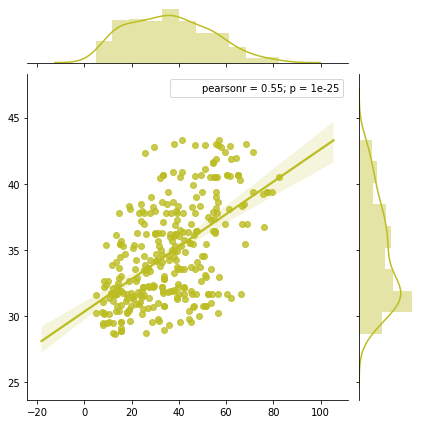

In [40]:
sns.jointplot(x=y_test, y=y_pred, data = data_copy, kind="reg", color=tableau20[16], stat_func=pearsonr);

In [41]:
### Linear Regression is showing as 55%, lets try Decision Tree

### Decision Tree Regression

In [42]:
data_copy_z = data_copy.apply(zscore)

X = data_copy_z.drop( ['strength'] , axis=1)
y = data_copy_z['strength']
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [43]:

regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.464058
slag          0.000000
ash           0.000000
water         0.088159
superplastic  0.000000
coarseagg     0.000000
fineagg       0.000000
age           0.447784


In [44]:
y_pred = regressor.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


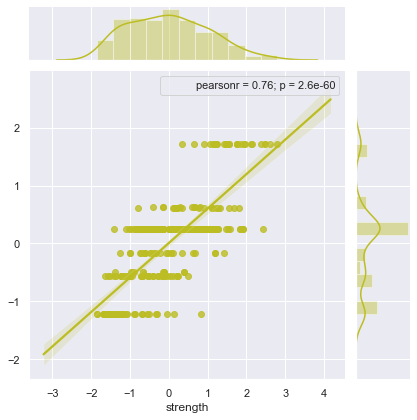

In [45]:
sns.set(style="darkgrid", color_codes=True)
          
sns.jointplot(x=y_test, y=y_pred, data = data_copy, kind="reg", color=tableau20[16], stat_func=pearsonr);

### Drop ash, superplastic, finearg, coarsearg column based on above analysis

In [46]:
X = data_copy_z.drop( ['ash','strength','superplastic','fineagg','coarseagg'] , axis=1)
y = data_copy_z['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [47]:
regressor.fit(X_train , y_train)

regressor.feature_importances_

print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

y_pred = regressor.predict(X_test)

             Imp
cement  0.464058
slag    0.000000
water   0.088159
age     0.447784


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


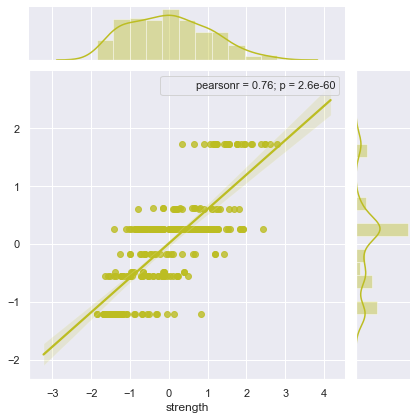

In [48]:
sns.jointplot(x=y_test, y=y_pred, kind="reg", color=tableau20[16], stat_func=pearsonr);

In [49]:
### Still it is 76%, now trying Random Forest Regressor

In [50]:
y = data_copy_z['strength']
X = data_copy_z.loc[:, data_copy_z.columns != 'strength']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42) # optimisation method which selects random samples
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

In [51]:

regressor = RandomForestRegressor(random_state=0, max_depth=3)

rfm = regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_

feature_names = data_copy_z.columns[0:8]
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.41002699 0.01597924 0.00144156 0.08882715 0.04450182 0.00159292
 0.00342992 0.4342004 ]
Index(['age', 'cement', 'water', 'superplastic', 'slag', 'fineagg',
       'coarseagg', 'ash'],
      dtype='object') [0.41002699 0.01597924 0.00144156 0.08882715 0.04450182 0.00159292
 0.00342992 0.4342004 ]


                   Imp
cement        0.410027
slag          0.015979
ash           0.001442
water         0.088827
superplastic  0.044502
coarseagg     0.001593
fineagg       0.003430
age           0.434200


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


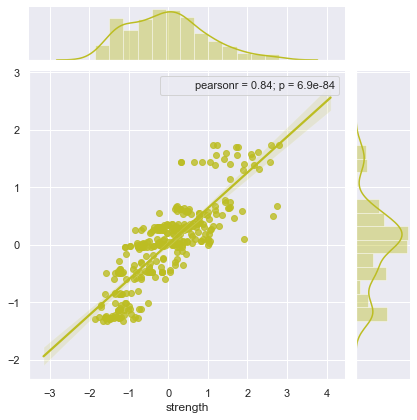

In [52]:
print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

y_pred = regressor.predict(X_test)
sns.jointplot(x=y_test, y=y_pred, kind="reg", color=tableau20[16], stat_func=pearsonr);

### Improvement of 84% with Random Forest Regressor, now dropping corasearg, fineagg, ash, slag 
### since feature importance is close to 0

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.41522318 0.09543698 0.05108228 0.43825756]
Index(['water', 'cement', 'slag', 'ash'], dtype='object') [0.41522318 0.09543698 0.05108228 0.43825756]
                   Imp
cement        0.415223
water         0.095437
superplastic  0.051082
age           0.438258


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


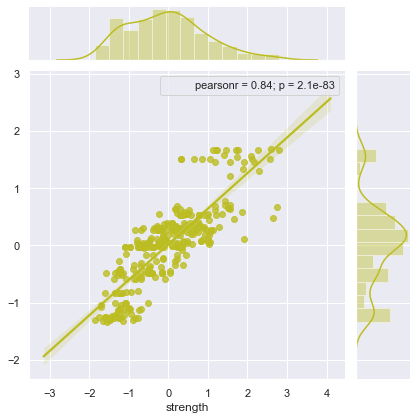

In [53]:
y = data_copy_z['strength']
X = data_copy_z.drop( ['ash','strength','slag','fineagg','coarseagg'] , axis=1)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42) # optimisation method which selects random samples
X_train.shape, X_test.shape, y_train.shape, y_test.shape

regressor = RandomForestRegressor(random_state=0, max_depth=3)

rfm = regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_

feature_names = data_copy_z.columns[0:8]
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

y_pred = regressor.predict(X_test)
sns.jointplot(x=y_test, y=y_pred, kind="reg", color=tableau20[16], stat_func=pearsonr);


### it remains at 84%

### Create a regularized RIDGE model and note the coefficients

In [54]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.4819259  -0.09675656  0.3107497   0.45517036]


In [55]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.5677237365337084
0.5225159730376225


In [56]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.47321925 -0.09096239  0.30396637  0.44416543]


In [57]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5674017989319242
0.5241156482248364


### Ridge and Lasso are showing low performance on the dataset where feature importance have been done. Lets try to do on the original dataset

In [58]:
data_copy_z = data_copy.apply(zscore)

X = data_copy_z.drop( ['strength'] , axis=1)
y = data_copy_z['strength']
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Ridge again

In [59]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model: [ 0.68963752  0.4198843   0.19811027 -0.18319593  0.14998867  0.02398845
  0.01361331  0.4667428 ]
0.665478249912539
0.6543757501179035


### Lasso again

In [60]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Lasso model: [ 0.62891124  0.35924222  0.13523442 -0.19181167  0.16456516 -0.
 -0.01084638  0.45163414]
0.6639637340028917
0.6539745323297101


### Both ridge and lasso will not work, the best algorithm is Random Forest as of now

### Polynomial Model to reflect no linear relation

In [61]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [62]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

In [63]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model: [ 0.          0.8147965   0.6145314   0.30855329 -0.04793324  0.18933187
  0.12166874  0.15047264  0.58352928  0.0631062   0.07859337 -0.1922799
 -0.06292103  0.05886215  0.03098137  0.19987076  0.09603734 -0.03563823
  0.0824484   0.08318244  0.14447165  0.30662409 -0.12156142 -0.07342552
  0.03374992  0.10780784  0.26022616  0.11697503 -0.08632362 -0.02410466
  0.01673491  0.08601082  0.09679354  0.01887273  0.11225464  0.10201711
  0.1452447 ]
0.7654043503767092
0.7274469340459


### Still not better than Random Forest

In [64]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Lasso model: [ 0.          0.61072409  0.37282892  0.10742498 -0.16905559  0.18002563
 -0.         -0.          0.5671976  -0.          0.         -0.07244338
 -0.03880302  0.          0.          0.          0.01595569  0.
  0.02384379  0.          0.08054321  0.13755817 -0.         -0.08274846
  0.          0.08467847  0.08847166  0.04406458 -0.0589862  -0.
 -0.08117788  0.03610168  0.02893822  0.04328269  0.08518131  0.00734539
 -0.        ]
0.7485111629809215
0.7145188843826664


### Not better than RandomForest, as of now Random Forest is the best

# Explore for gaussians. 

### Lets do pairplot one more time

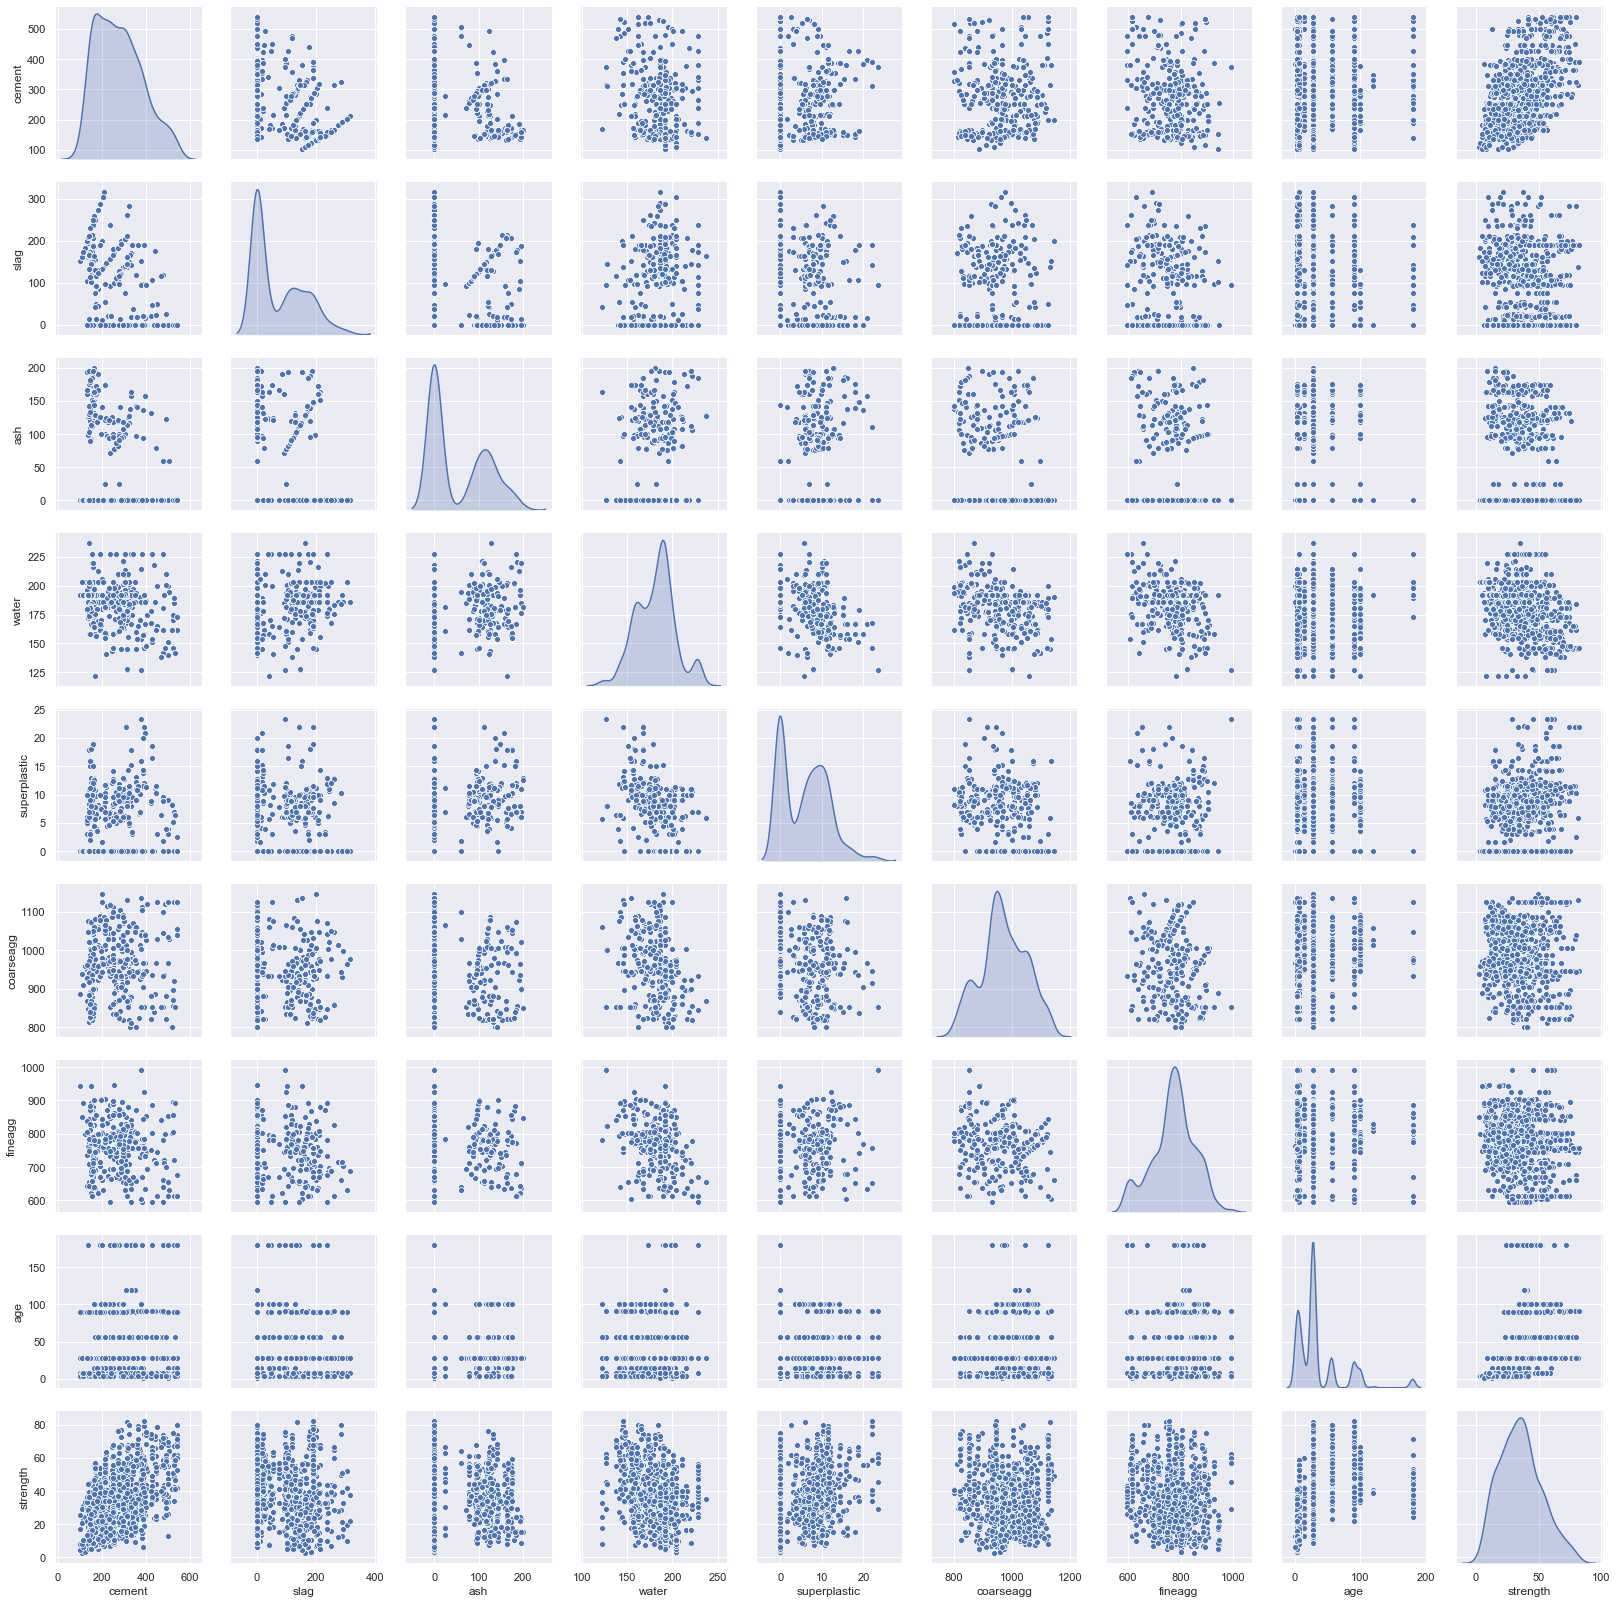

In [65]:
sns.pairplot(data_copy, diag_kind='kde')
# plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

# Slag, Ash are showing to have 2 clusters while the maximum cluster is for age which is 5. At max there can be 10 cluster

# K Means Clustering

In [66]:
cluster_range = range( 2, 6 )   # expect 2 to five clusters from the pair panel visual inspection hence restricting from 2 to 5
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data_copy)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2.848168e+07
1,3,2.224476e+07
2,4,1.939824e+07
3,5,1.727298e+07


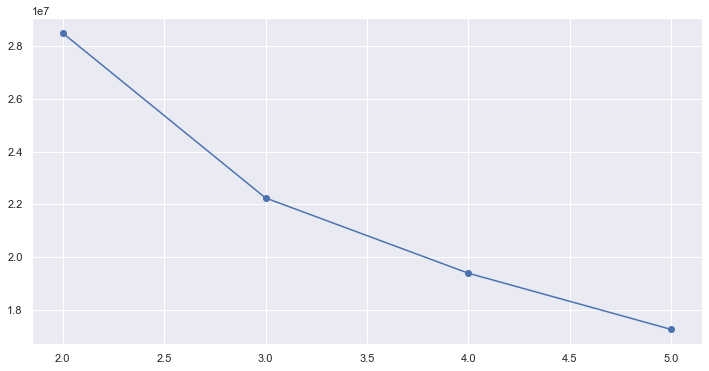

In [67]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# The elbow plot confirms that there are either 3 or 4 good clusters
# We will start with 3 clusters

In [68]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(data_copy_z)

prediction=cluster.predict(data_copy_z)
data_copy_z["GROUP"] = prediction 

In [69]:
centroids = cluster.cluster_centers_
centroids

array([[-0.62734436, -0.40561389,  1.12732421, -0.29034624,  0.49266334,
         0.09776705,  0.22952024, -0.02834392, -0.24551265],
       [ 0.95146378,  0.51998064, -0.40333363, -0.85465855,  0.95895981,
        -0.65473861,  0.10300104, -0.08527429,  1.11554444],
       [ 0.06671499,  0.09274367, -0.80069902,  0.70574287, -0.94151755,
         0.25353277, -0.25949052,  0.06985509, -0.36118552]])

In [70]:
centroid_df = pd.DataFrame(centroids, columns = list(data_copy_z) )

ValueError: Shape of passed values is (3, 9), indices imply (3, 10)

In [ ]:
centroid_df

### Let us analyze strength with other columns

In [ ]:
# strength Vs slag

var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=data_copy_z,hue='GROUP')
plot.set(ylim = (-3,3))

### the best fit line is almost parallel so slag is not a good predictor for strength

In [ ]:
# strength Vs cement

var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=data_copy_z,hue='GROUP')
plot.set(ylim = (-3,3))

In [ ]:
### The orange one is good predictor for strength

In [ ]:
# strength Vs ash

var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=data_copy_z,hue='GROUP')
plot.set(ylim = (-3,3))

### Blue and Orange are not good predictors since the best fit lines are parallel, blue can be a good predictor

In [ ]:
# strength Vs water

var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=data_copy_z,hue='GROUP')
plot.set(ylim = (-3,3))

### Orange and blue are parallel lines, green can be a good predictor

In [ ]:
# strength Vs superplastic

var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=data_copy_z,hue='GROUP')
plot.set(ylim = (-3,3))

### Not a good predictor

In [ ]:
# strength Vs coarseagg

var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=data_copy_z,hue='GROUP')
plot.set(ylim = (-3,3))

### Not a good predictor

In [ ]:
# strength Vs fineagg

var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=data_copy_z,hue='GROUP')
plot.set(ylim = (-3,3))

### Green line can be a good predictor

In [ ]:
# strength Vs age

var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=data_copy_z,hue='GROUP')
plot.set(ylim = (-3,3))

### All 3 lines can be a good predictor

# Tuning the model

### We will go with Random Forest Regressor, calculating the prediction % again

In [ ]:
y = data_copy_z['strength']
X = data_copy_z.drop( ['ash','strength','slag','fineagg','coarseagg'] , axis=1)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42) # optimisation method which selects random samples
X_train.shape, X_test.shape, y_train.shape, y_test.shape

regressor = RandomForestRegressor(random_state=0, max_depth=3, n_estimators=50)
rfm = regressor.fit(X_train , y_train)


In [ ]:
rfm

In [ ]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, 4,5,6,None],
              "max_features": ["auto", "sqrt", "log2"],
              "min_samples_split": sp_randint(2, 8),
              "min_samples_leaf": sp_randint(1, 8),
              "n_estimators" : sp_randint(1, 50)}

In [ ]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=samples) #default cv = 3

In [ ]:
randomCV.fit(X_train , y_train)

 
print(randomCV.best_params_)

### Above is the best parameter which needs to be used, lets check the score with the same

In [ ]:
y_pred = randomCV.predict(X_test)
sns.jointplot(x=y_test, y=y_pred, kind="reg", color=tableau20[16], stat_func=pearsonr);

### So we can see now the score improved to 90%

### Lets do grid search and check what is the difference

In [ ]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, 4,5,6,None],
              "max_features": ["auto", "sqrt", "log2"],
              "min_samples_split":[1,2,3,4,5],
              "min_samples_leaf": [1,2,3,4,5]}
grid_search = GridSearchCV(regressor, param_grid=param_dist)
start = time()
start
grid_search.fit(X_train , y_train)

In [ ]:
grid_search.best_params_

In [ ]:
sns.jointplot(x=y_test, y=y_pred, kind="reg", color=tableau20[16], stat_func=pearsonr);

In [ ]:
### 91% with Gridsearch, we can go with Random Search since GridSearch is time consuming